<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Análise e visualização inicial dos dados

**Descrição da atividade**: Utilizar técnicas de `Cullen-Frey`, `Histogramas` e `PDFs`: A partir do dataset do seu Team visualize, obtenha os respectivos Histogramas e PDFs para as seguintes variáveis: Número Total de Casos, Número Total de Mortes, Número Total De Testes, `Número Diário de Casos (NDC)`, `Número Diário de Mortes (NDM)`, `Número Diário de Testes (NDT)`. Identifique semelhanças e discrepâncias entre os países. Este exercício é apenas para os dados da OWD. Implemente ainda uma análise de regressão linear em Python entre as variáveis: NDC e NDT para os países que apresentam PDF próximas.

<hr>

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_05_11.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])

### Visualização geral dos dados

Antes de iniciar a aplicação das técnicas sobre os conjuntos de dados, faz-se necessário a visualização destes, entendendo o comportamento de tais dados para cada país. Os tópicos abaixo apresentam esta visualização inicial.

* Número total de casos

In [3]:
countries = data_owd.groupby('iso_code')

In [4]:
NAMES = {
    'BRA': 'Brasil',
    'CAN': 'Canadá',
    'CUB': 'Cuba',
    'MEX': 'México',
    'RUS': 'Rússia'
}

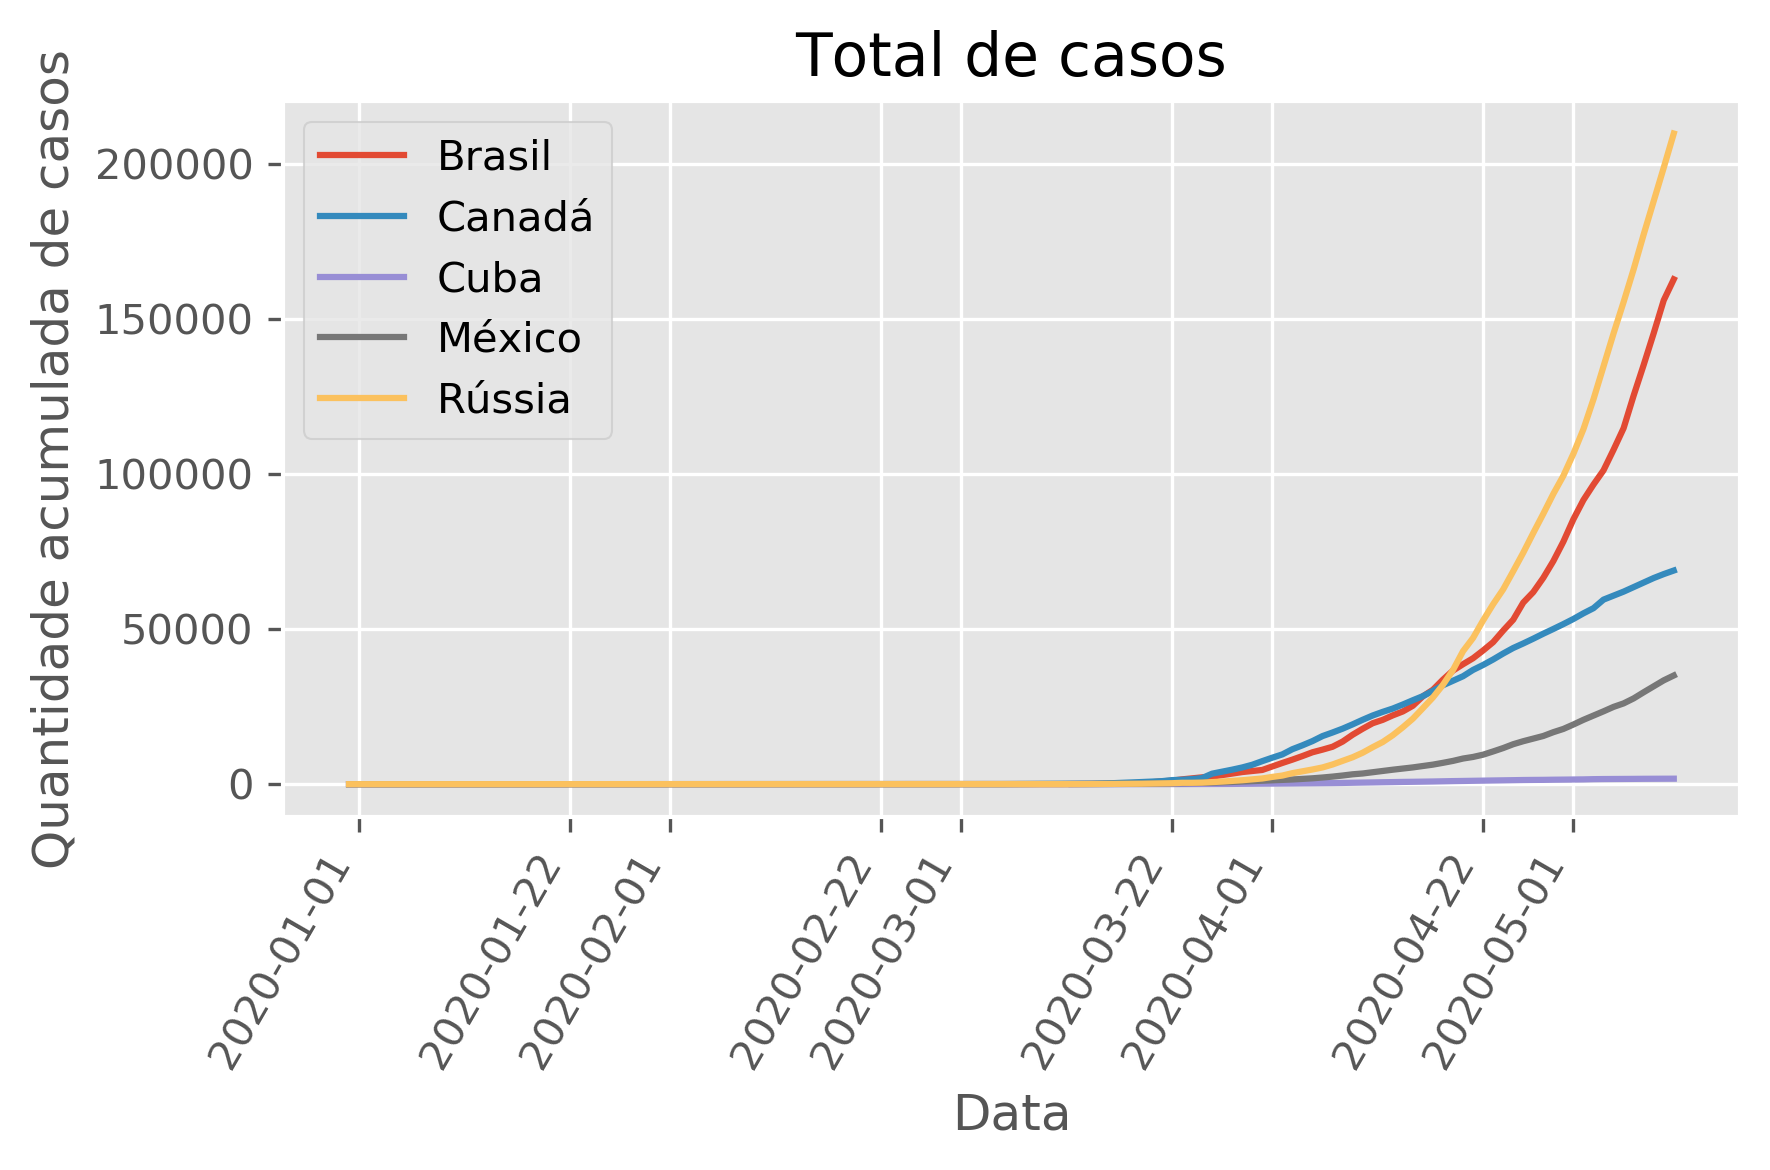

In [5]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de casos')
plt.title('Total de casos')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número total de mortes

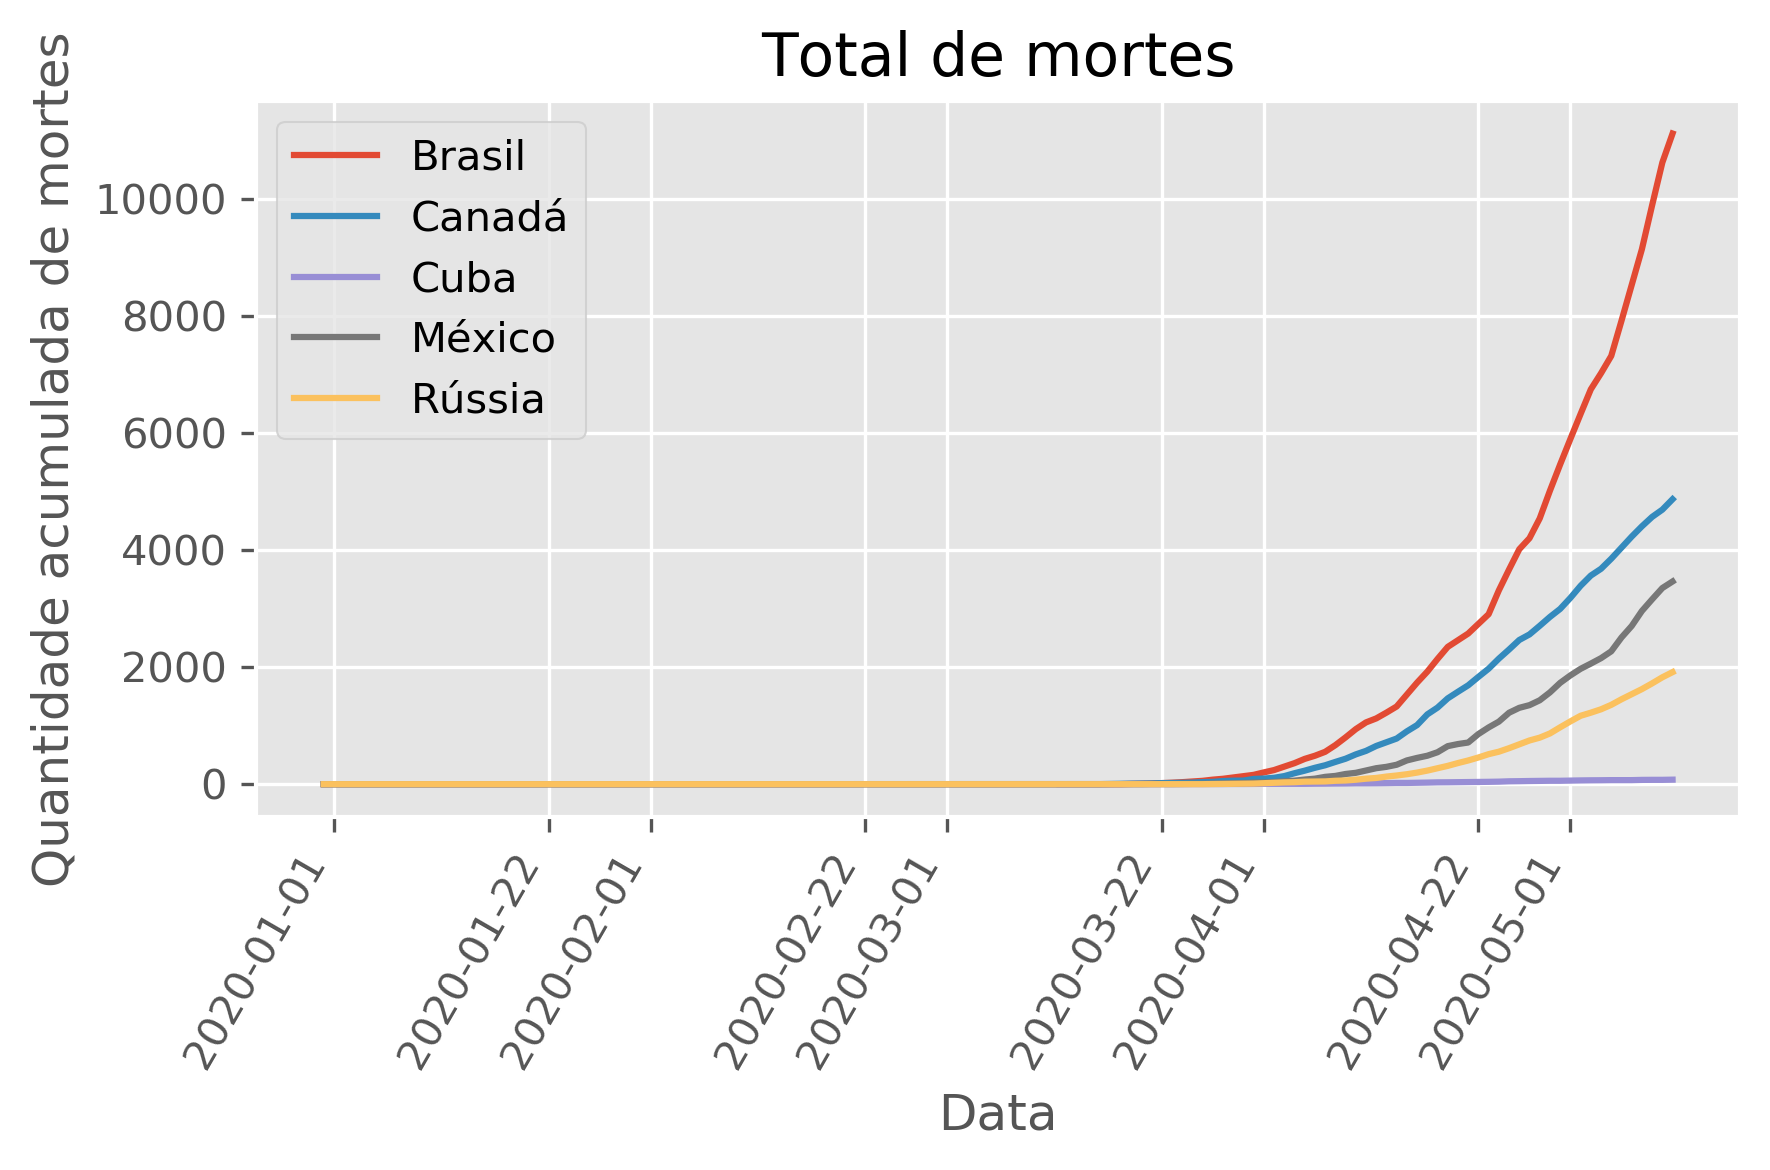

In [6]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de mortes')
plt.title('Total de mortes')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número total de testes (Em análise com o professor)

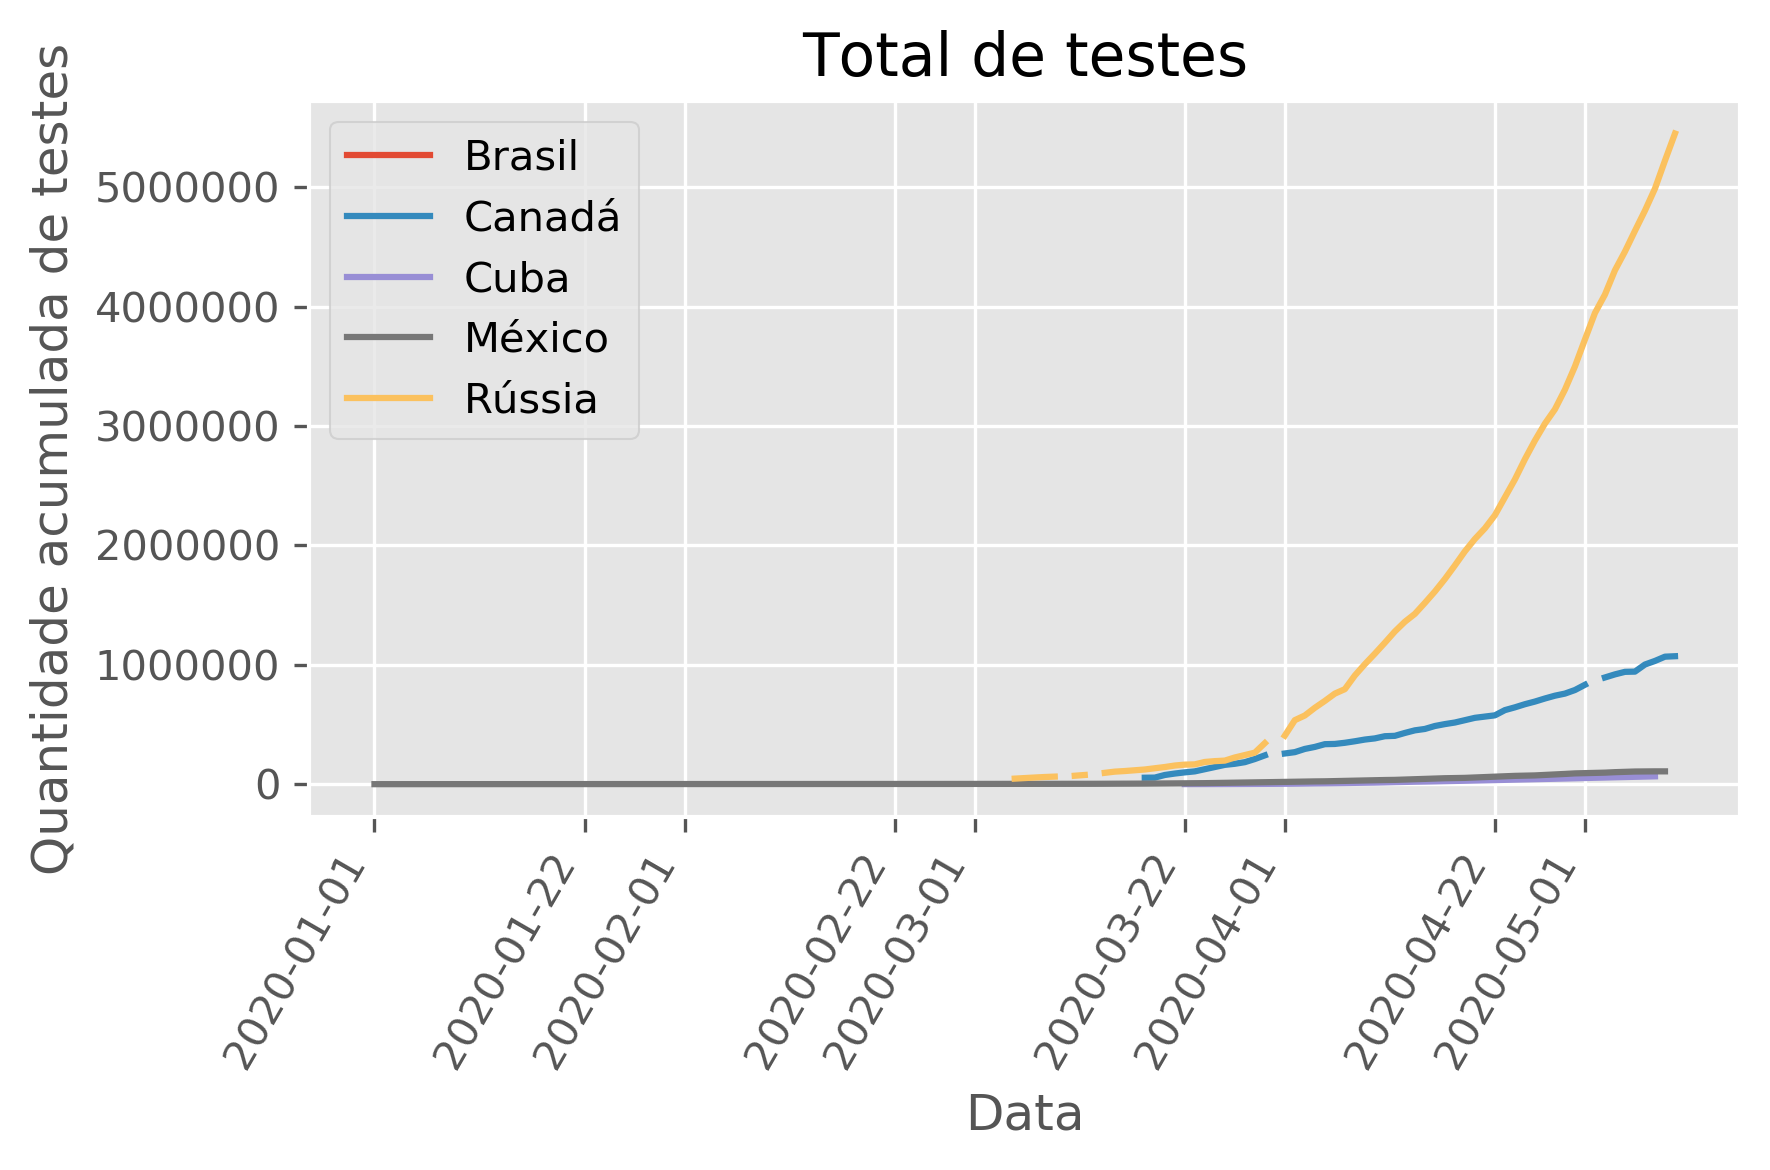

In [7]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de testes')
plt.title('Total de testes')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

* Número diário de casos (NDC)


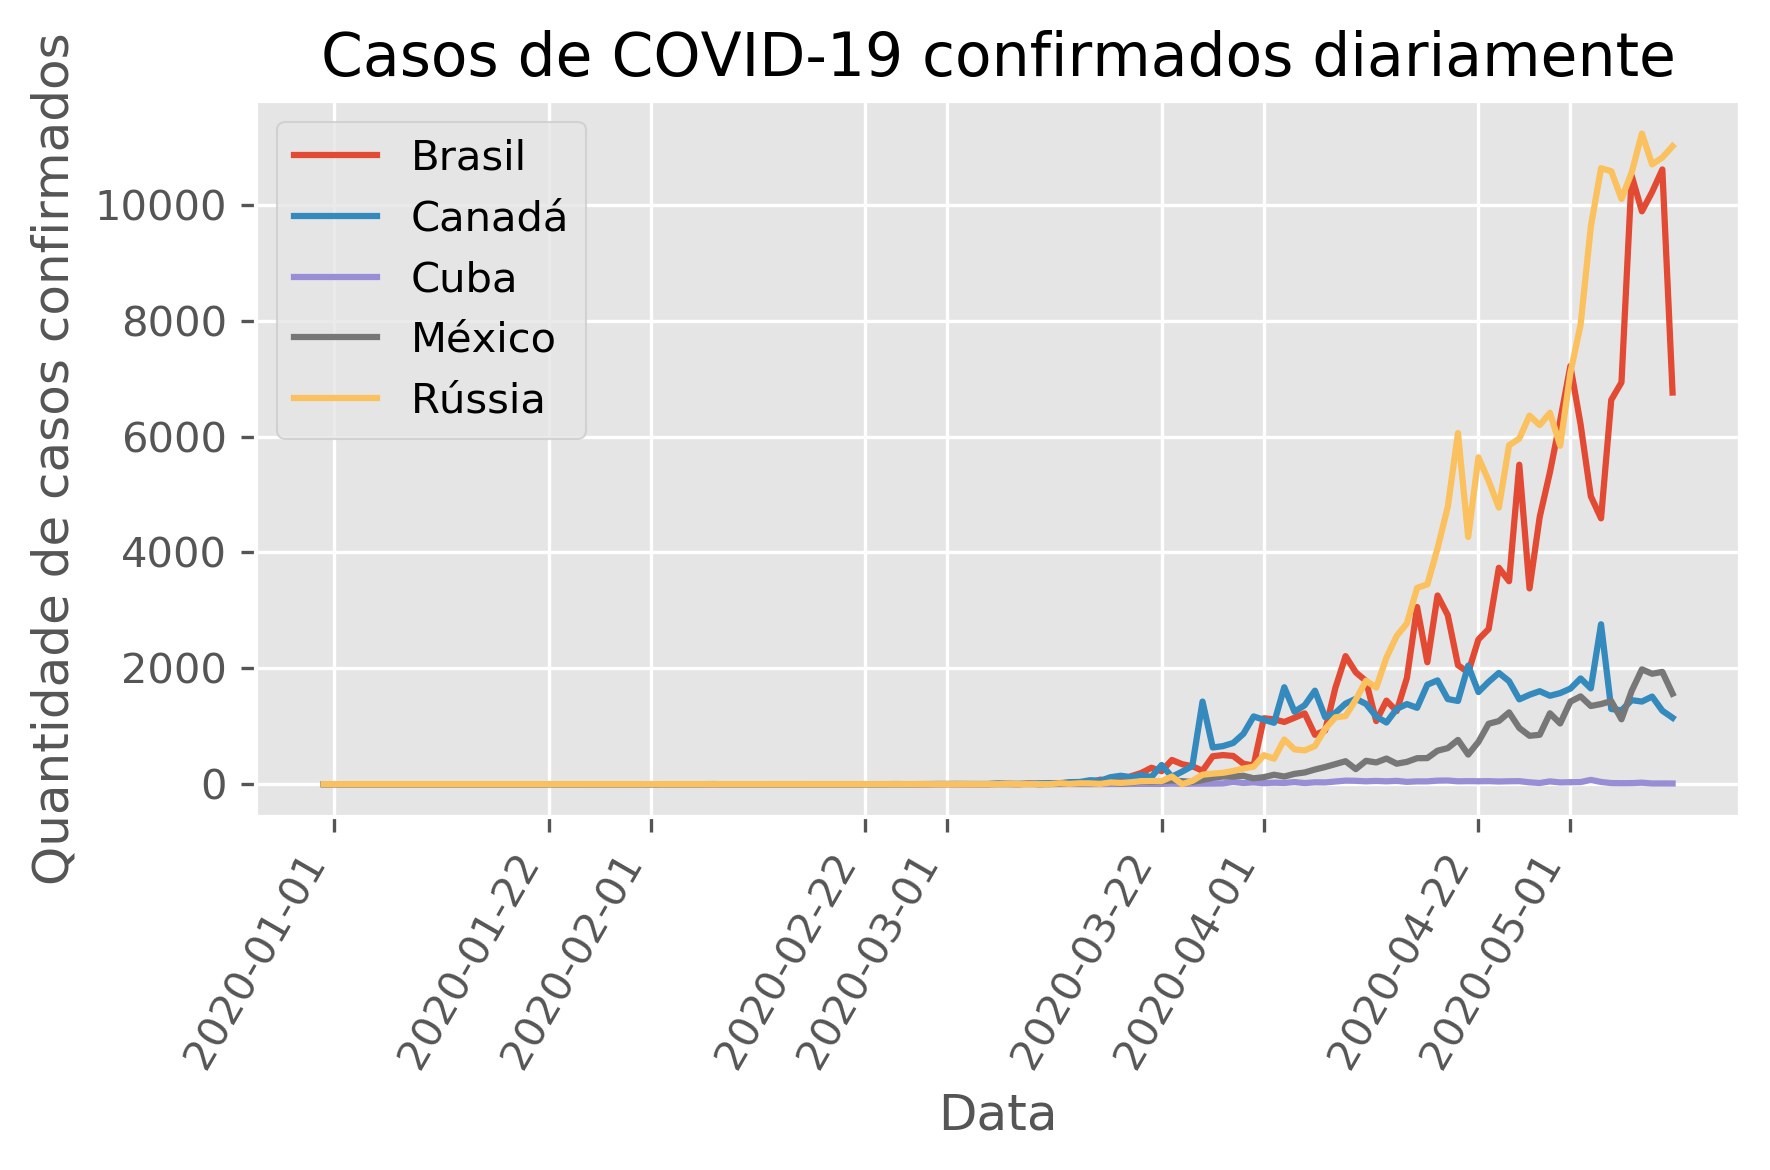

In [8]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos confirmados')
plt.title('Casos de COVID-19 confirmados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número diário de mortes (NDM)

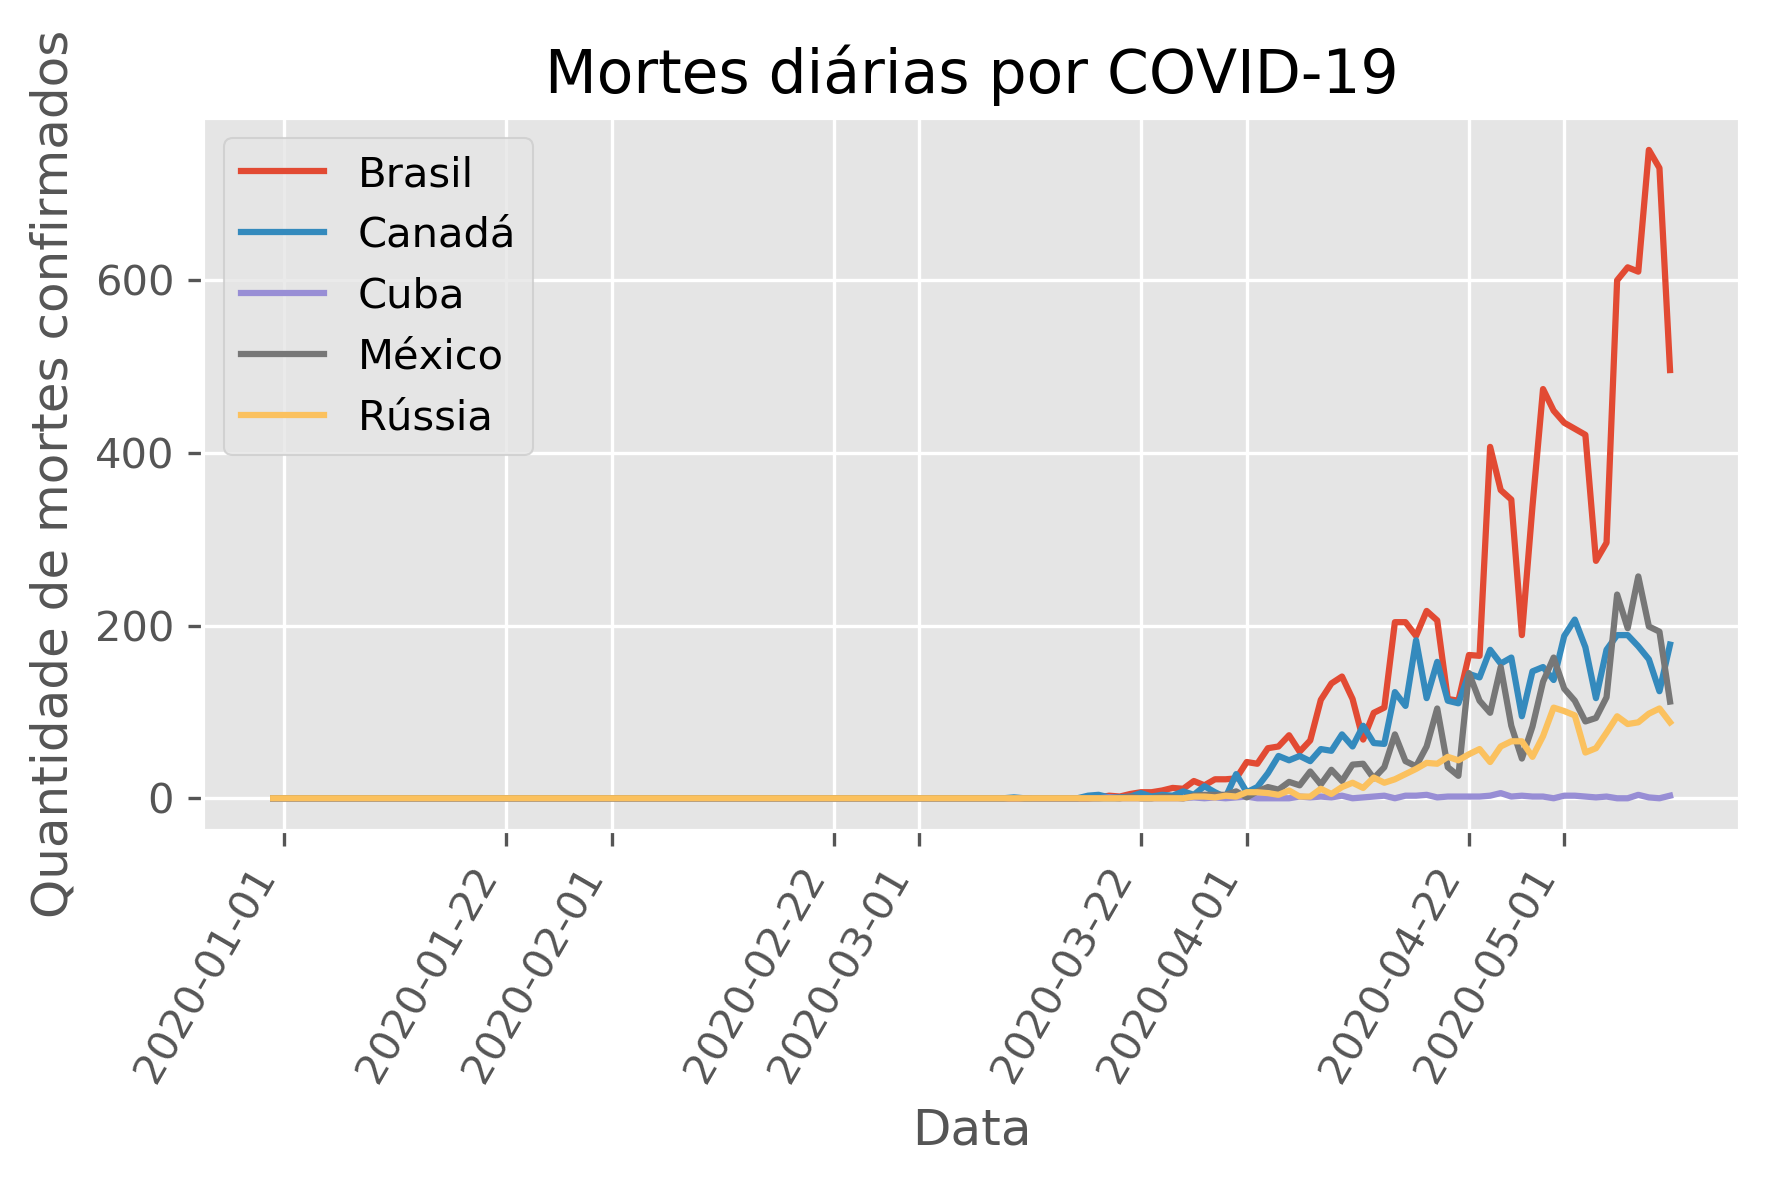

In [9]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de mortes confirmados')
plt.title('Mortes diárias por COVID-19')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número diário de testes

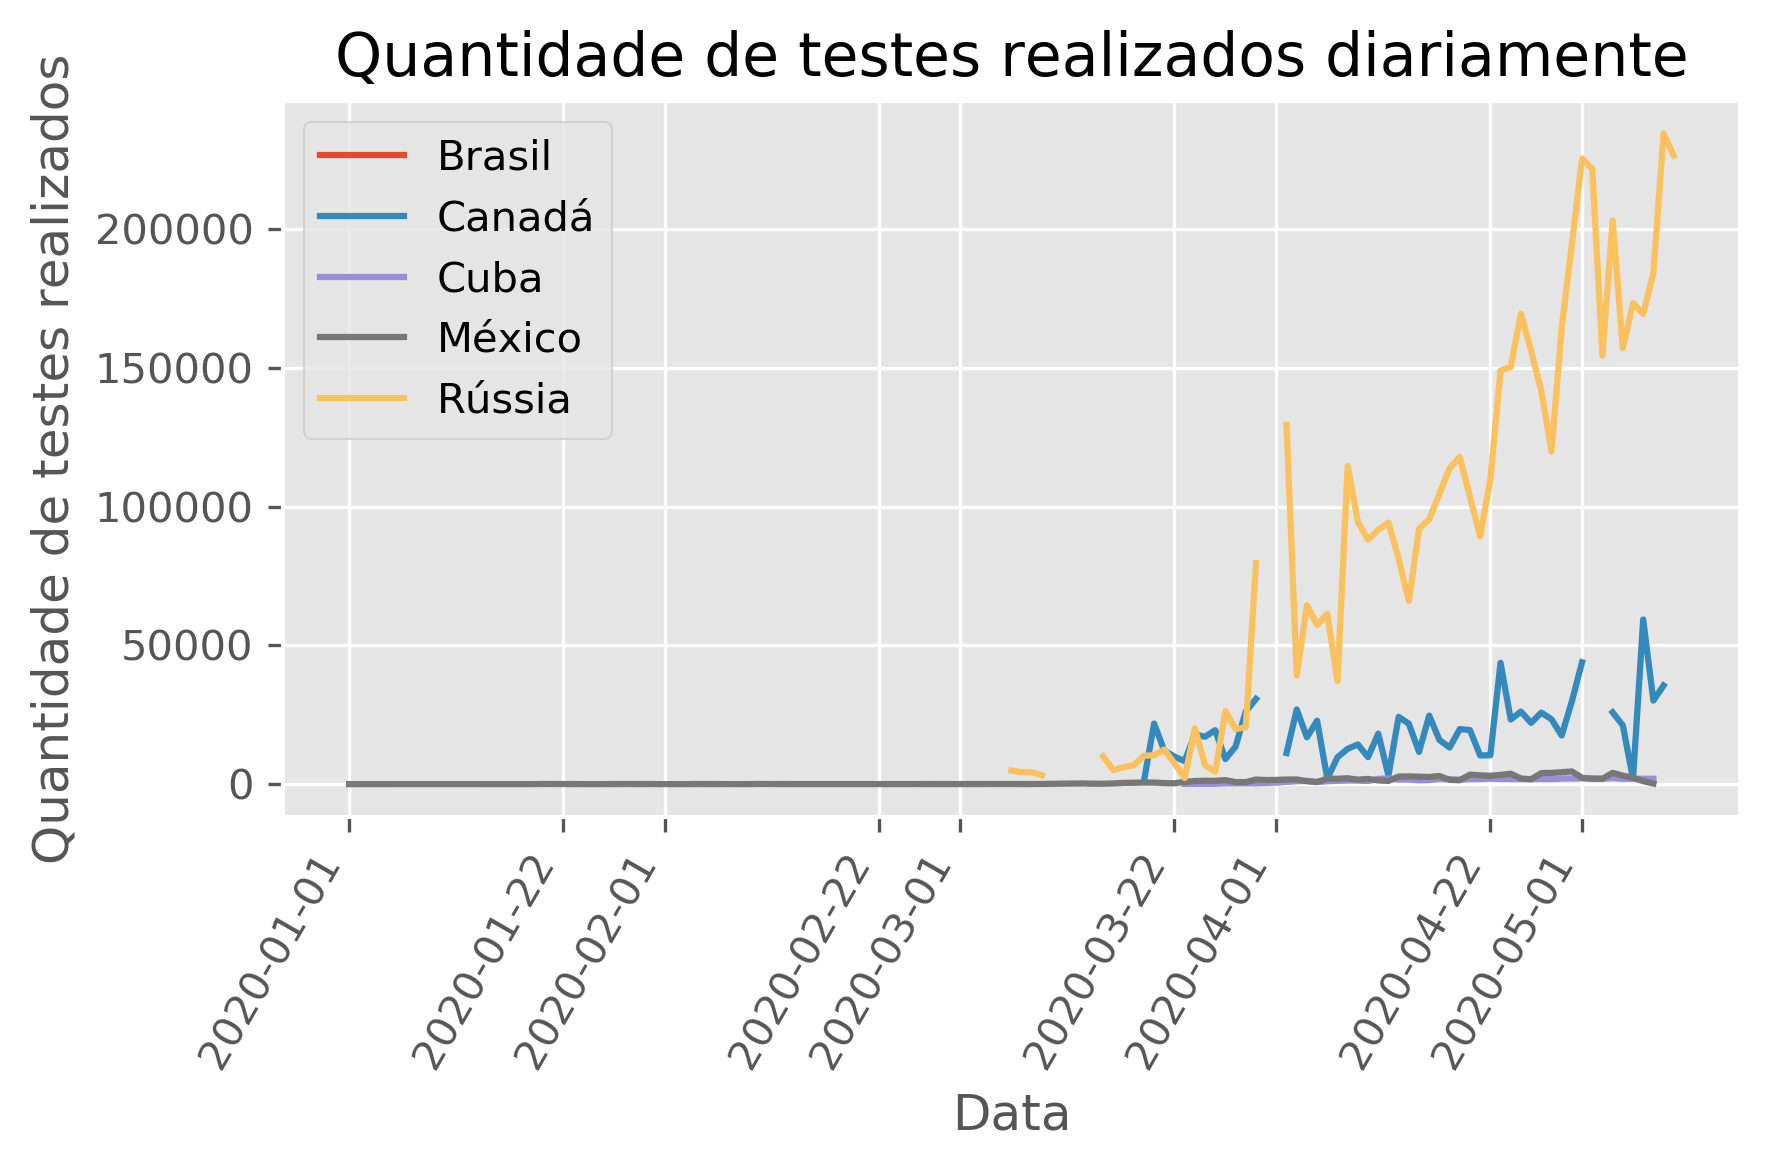

In [10]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de testes realizados')
plt.title('Quantidade de testes realizados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

### Histogramas

In [11]:
labelerfnc = lambda x: NAMES[x] # Criado para facilitar a exibição dos nomes


def standardize_bycountry(data, variable):
    """Função para agrupar por país e normalizar os dados
    """
    
    def standardize_factor(distribution):
        return (distribution - np.mean(distribution)) / np.std(distribution)
    def normalize_minmax(data):
        return (data - data.min()) / (data.max() - data.min())
    
    res = []
    groups = data.groupby('iso_code')
    for group in groups:
        group_data = groups.get_group(group[0])
        
        res.append(
            pd.DataFrame({
                variable: normalize_minmax(group_data[variable])
            })
        )
        res[-1]['iso_code'] = group[0]
    return pd.concat(res)

    
def plot_histogram_bycountry(data, variable_to_plot, title, xlabel, ylabel):
    """Função para gerar os histogramas normalizados, por país.
    """
    data_owd = standardize_bycountry(data, variable_to_plot)
    
    return (
        ggplot(data_owd, aes(variable_to_plot))
            + geom_histogram(bins = 19)
            + ggtitle(title)
            + xlab(xlabel) + ylab(ylabel)
            + facet_wrap('~iso_code', labeller = labelerfnc)
            + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
    )

In [12]:
# tmp: Filtrando para remover alguns zeros (Necessário ? Ao fazer há uma melhora na interpretação dos resultados)
data_owd = data_owd[data_owd['date'] >= '2020-03-20']

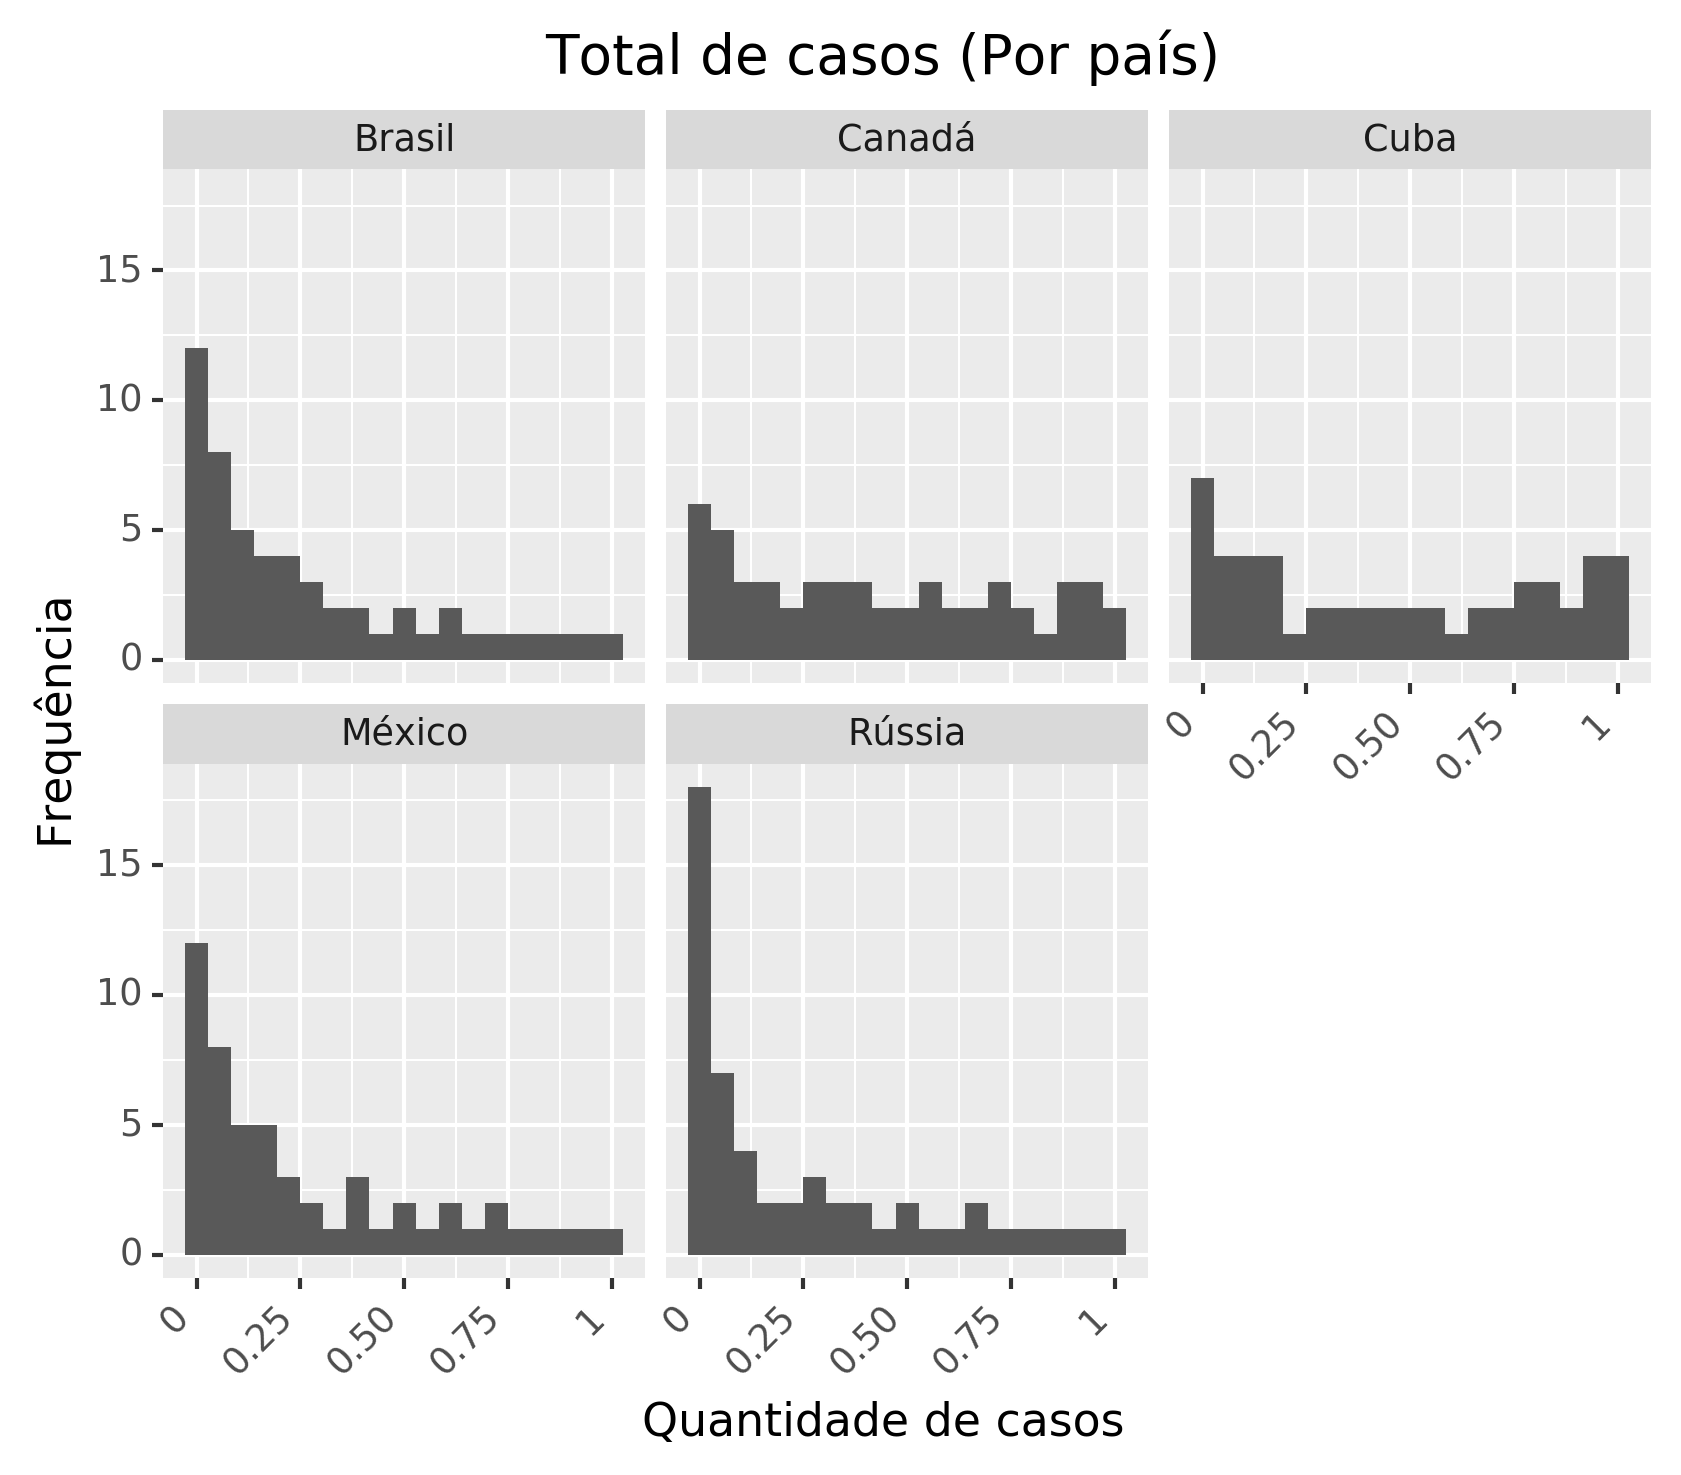

<ggplot: (8756037551999)>

In [17]:
plot_histogram_bycountry(data_owd, 'total_cases', 'Total de casos (Por país)', 
                                                             'Quantidade de casos', 'Frequência')

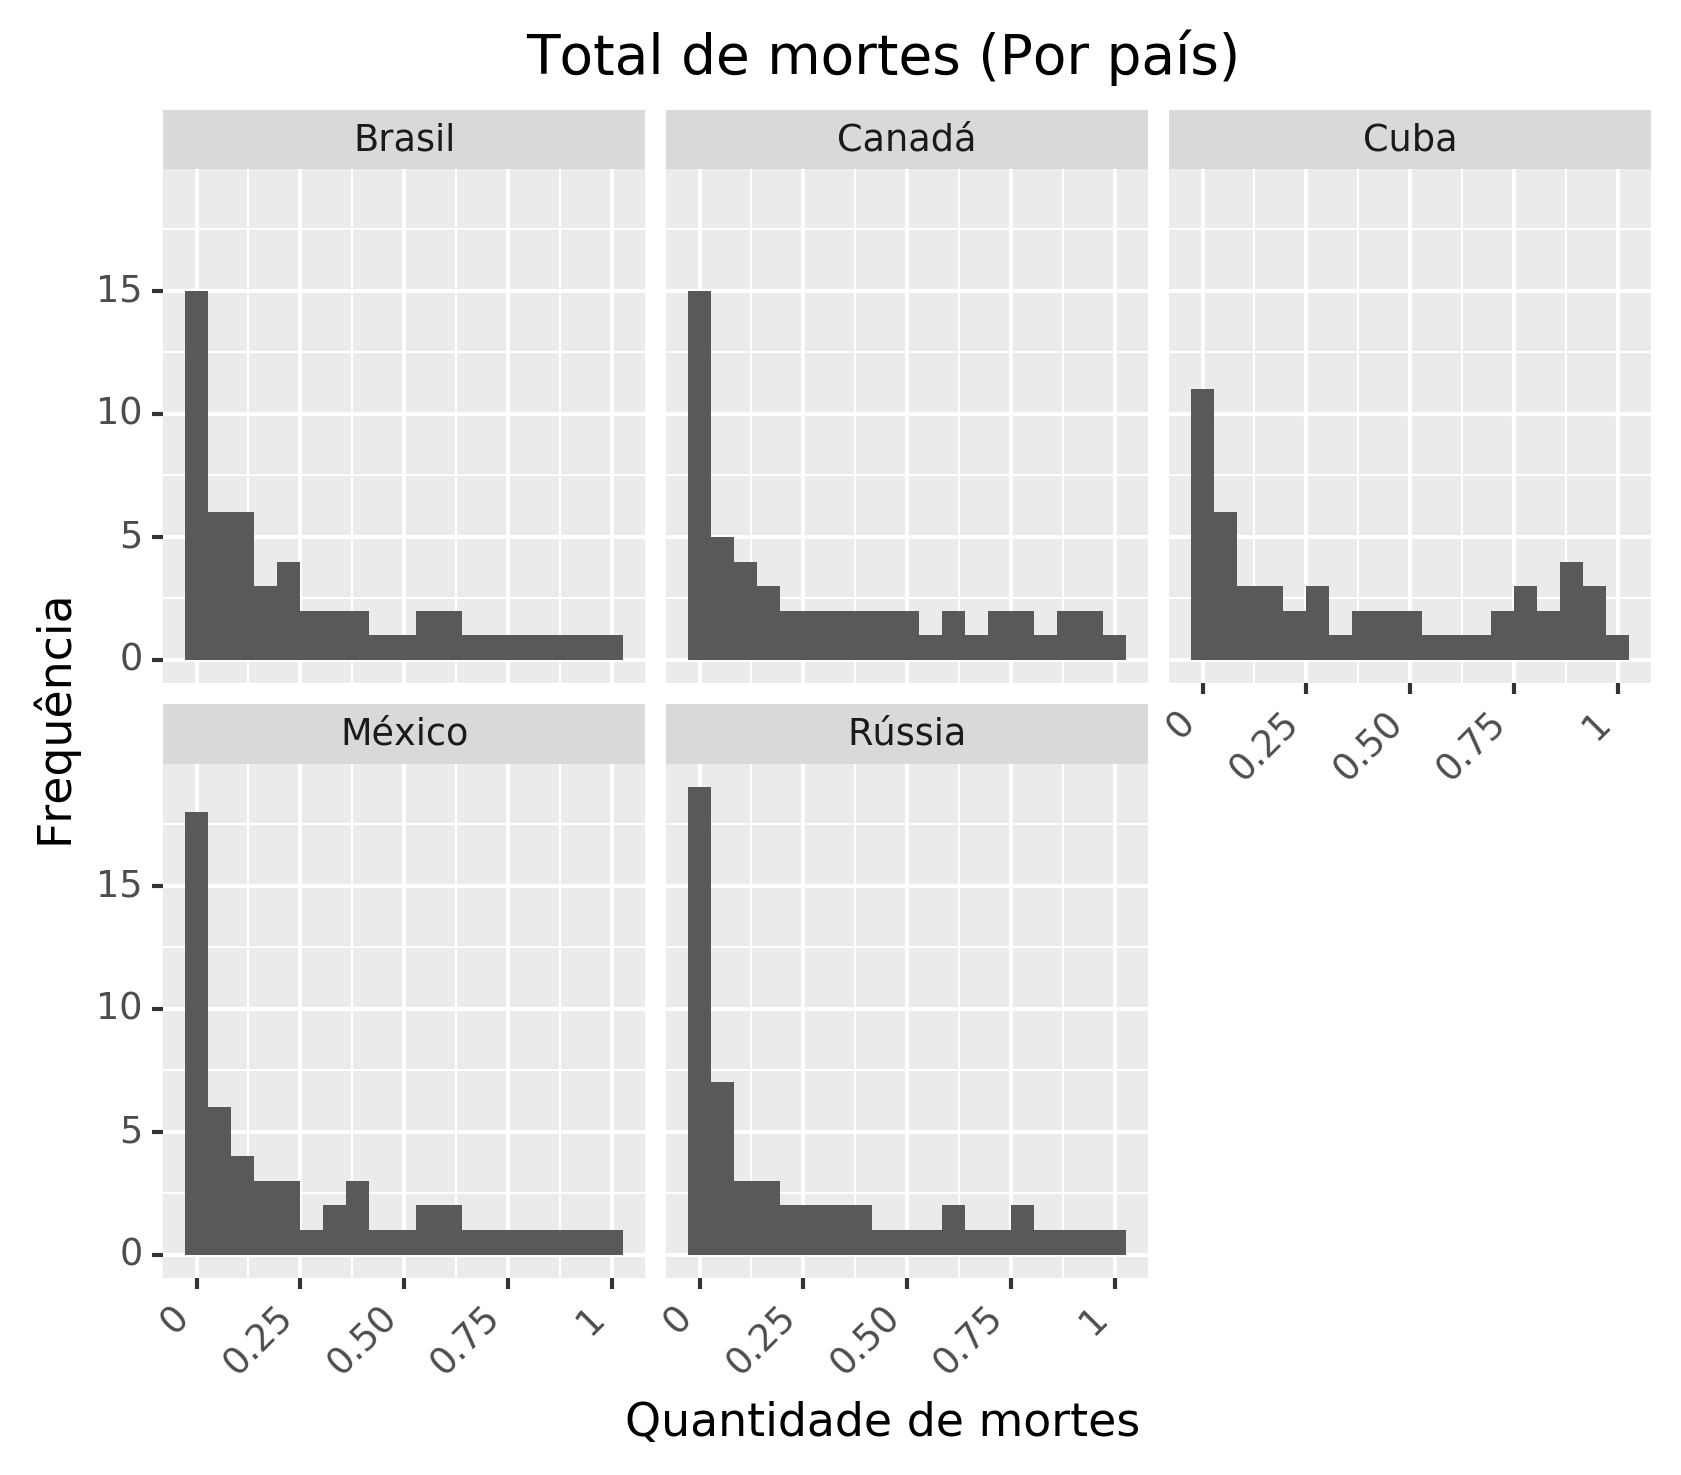

<ggplot: (8756037577974)>

In [18]:
plot_histogram_bycountry(data_owd, 'total_deaths', 'Total de mortes (Por país)', 
                                                             'Quantidade de mortes', 'Frequência')

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 12 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


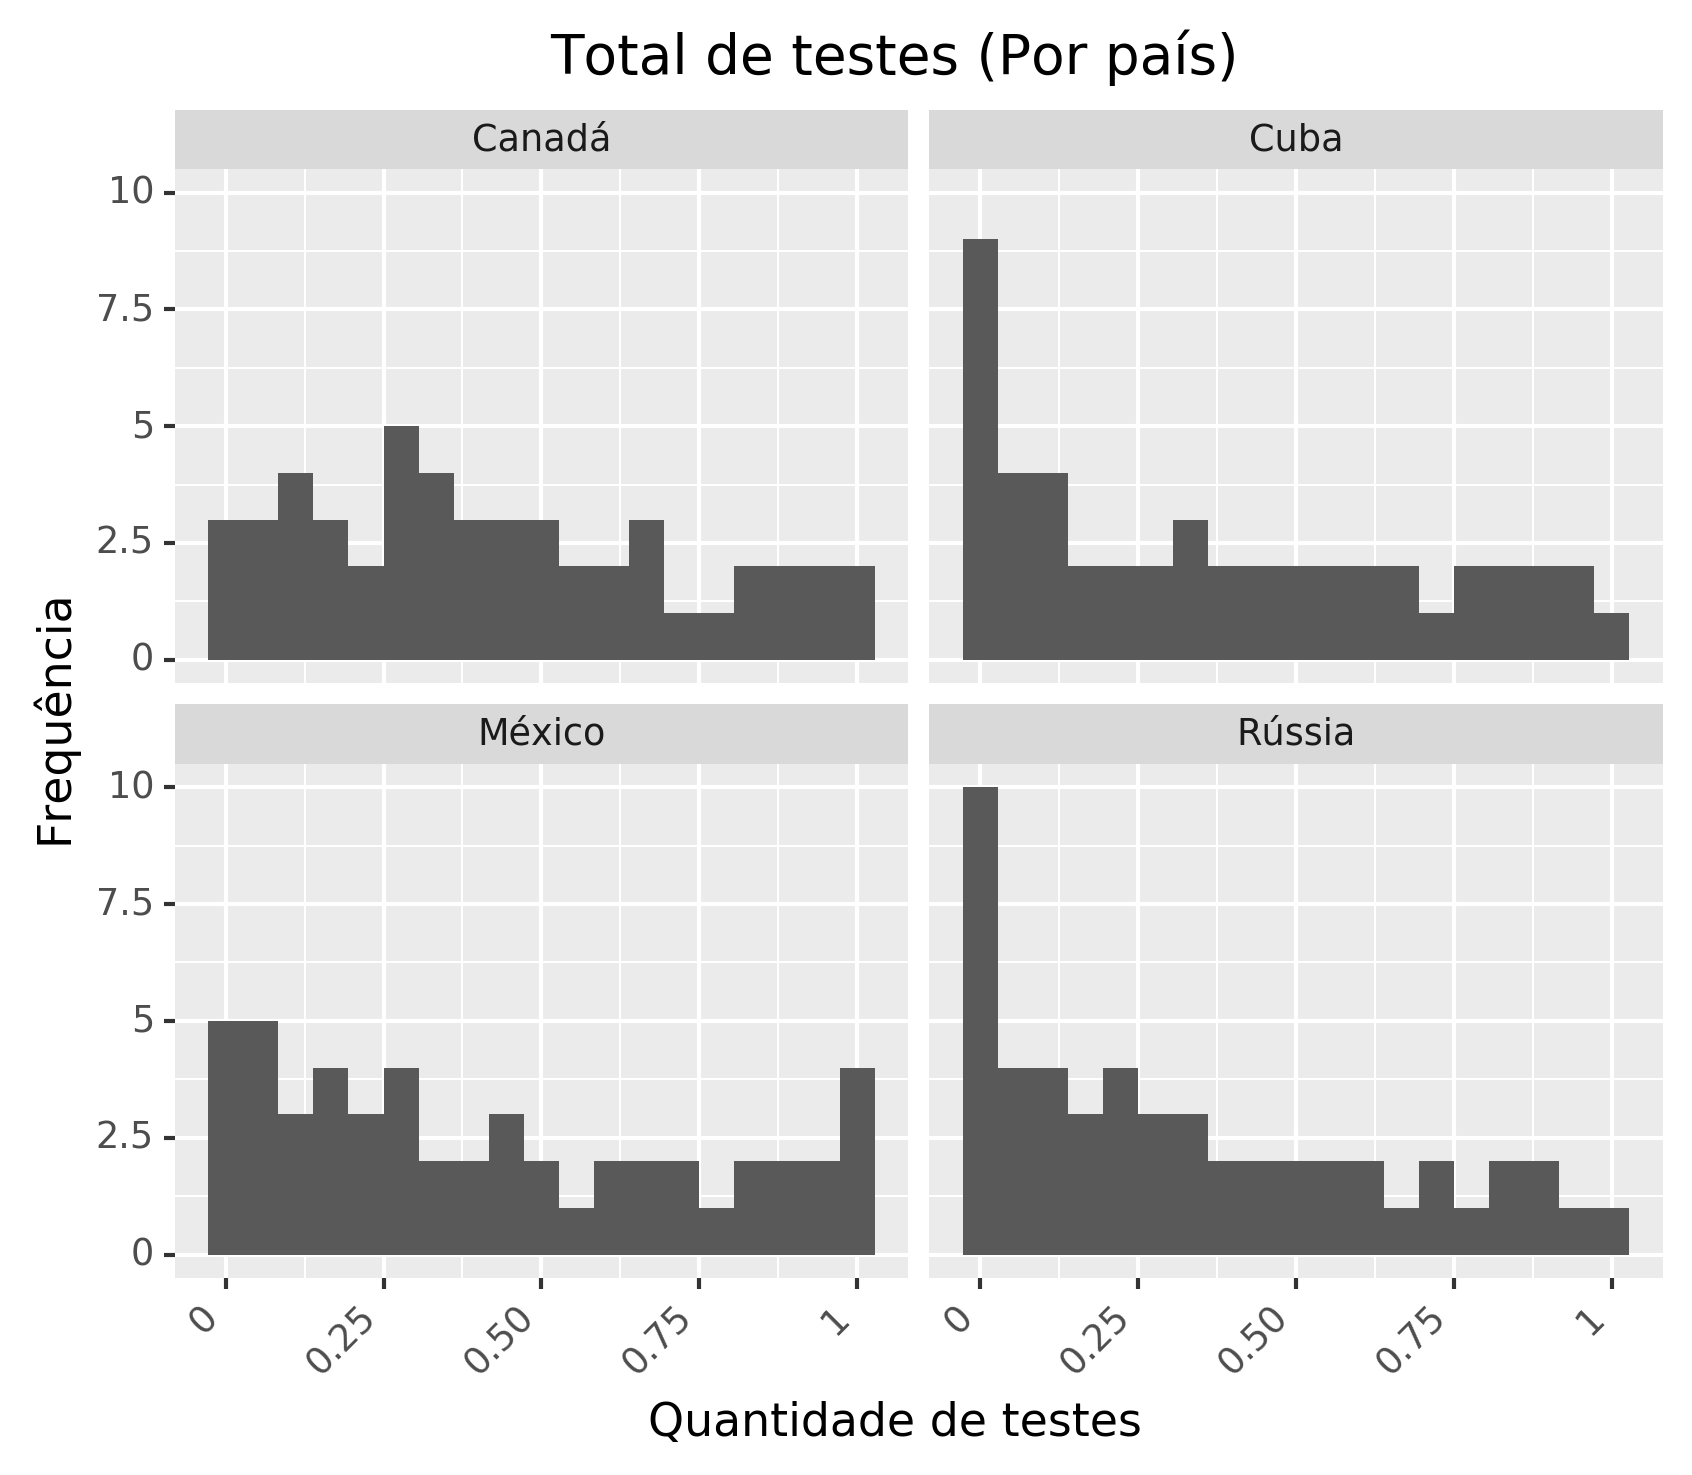

<ggplot: (-9223363280816200781)>

In [19]:
# Excluíndo Brasil da análise
# Não contém uma quantidade suficiente de dados
_data = data_owd.copy()
_data = _data[_data['iso_code'] != 'BRA']

plot_histogram_bycountry(_data, 'total_tests', 'Total de testes (Por país)', 
                                                             'Quantidade de testes', 'Frequência')

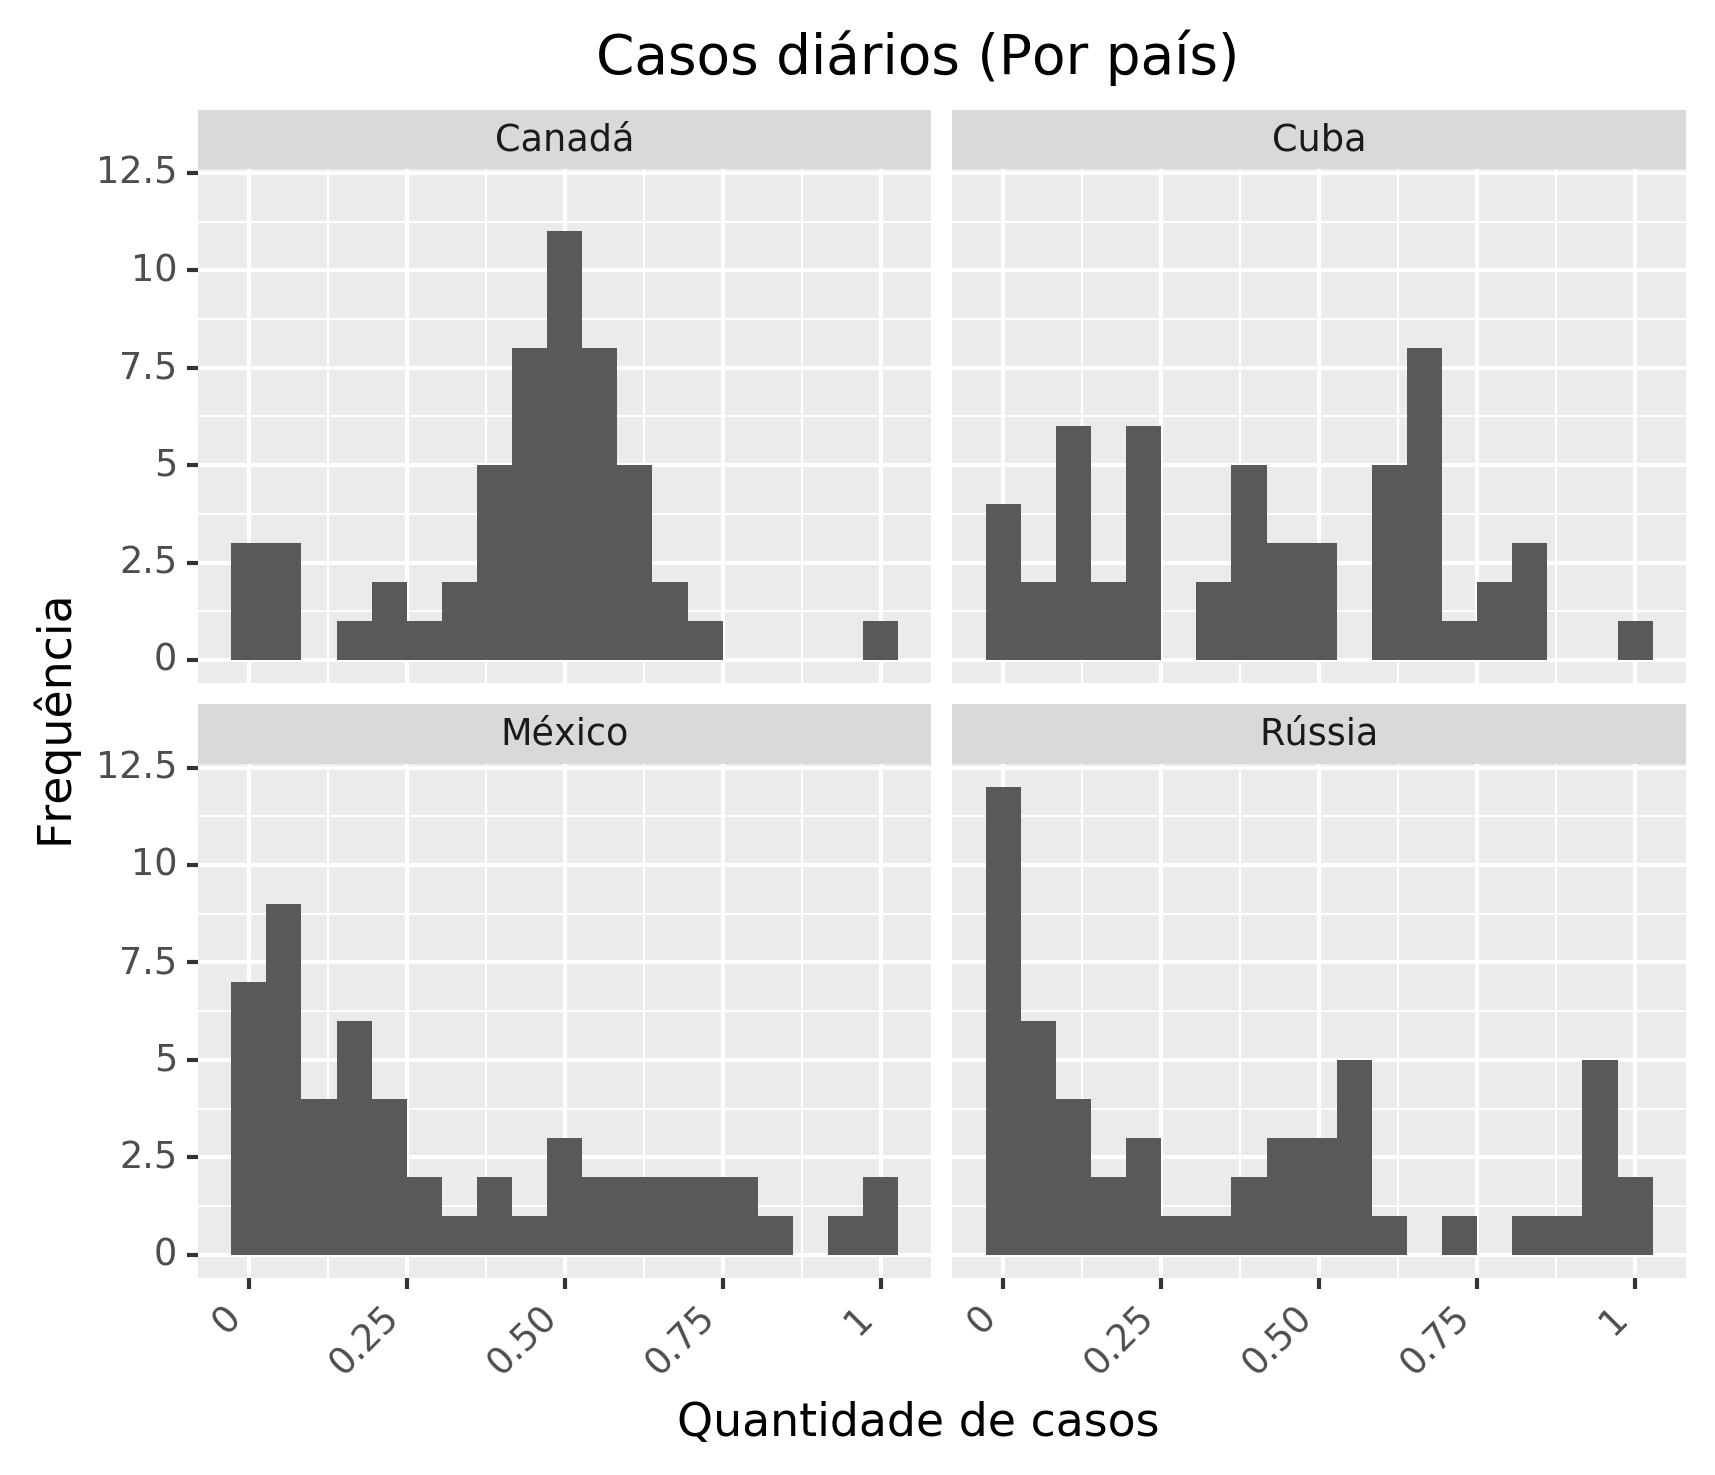

<ggplot: (8756038461767)>

In [20]:
plot_histogram_bycountry(_data, 'new_cases', 'Casos diários (Por país)', 
                                                             'Quantidade de casos', 'Frequência')

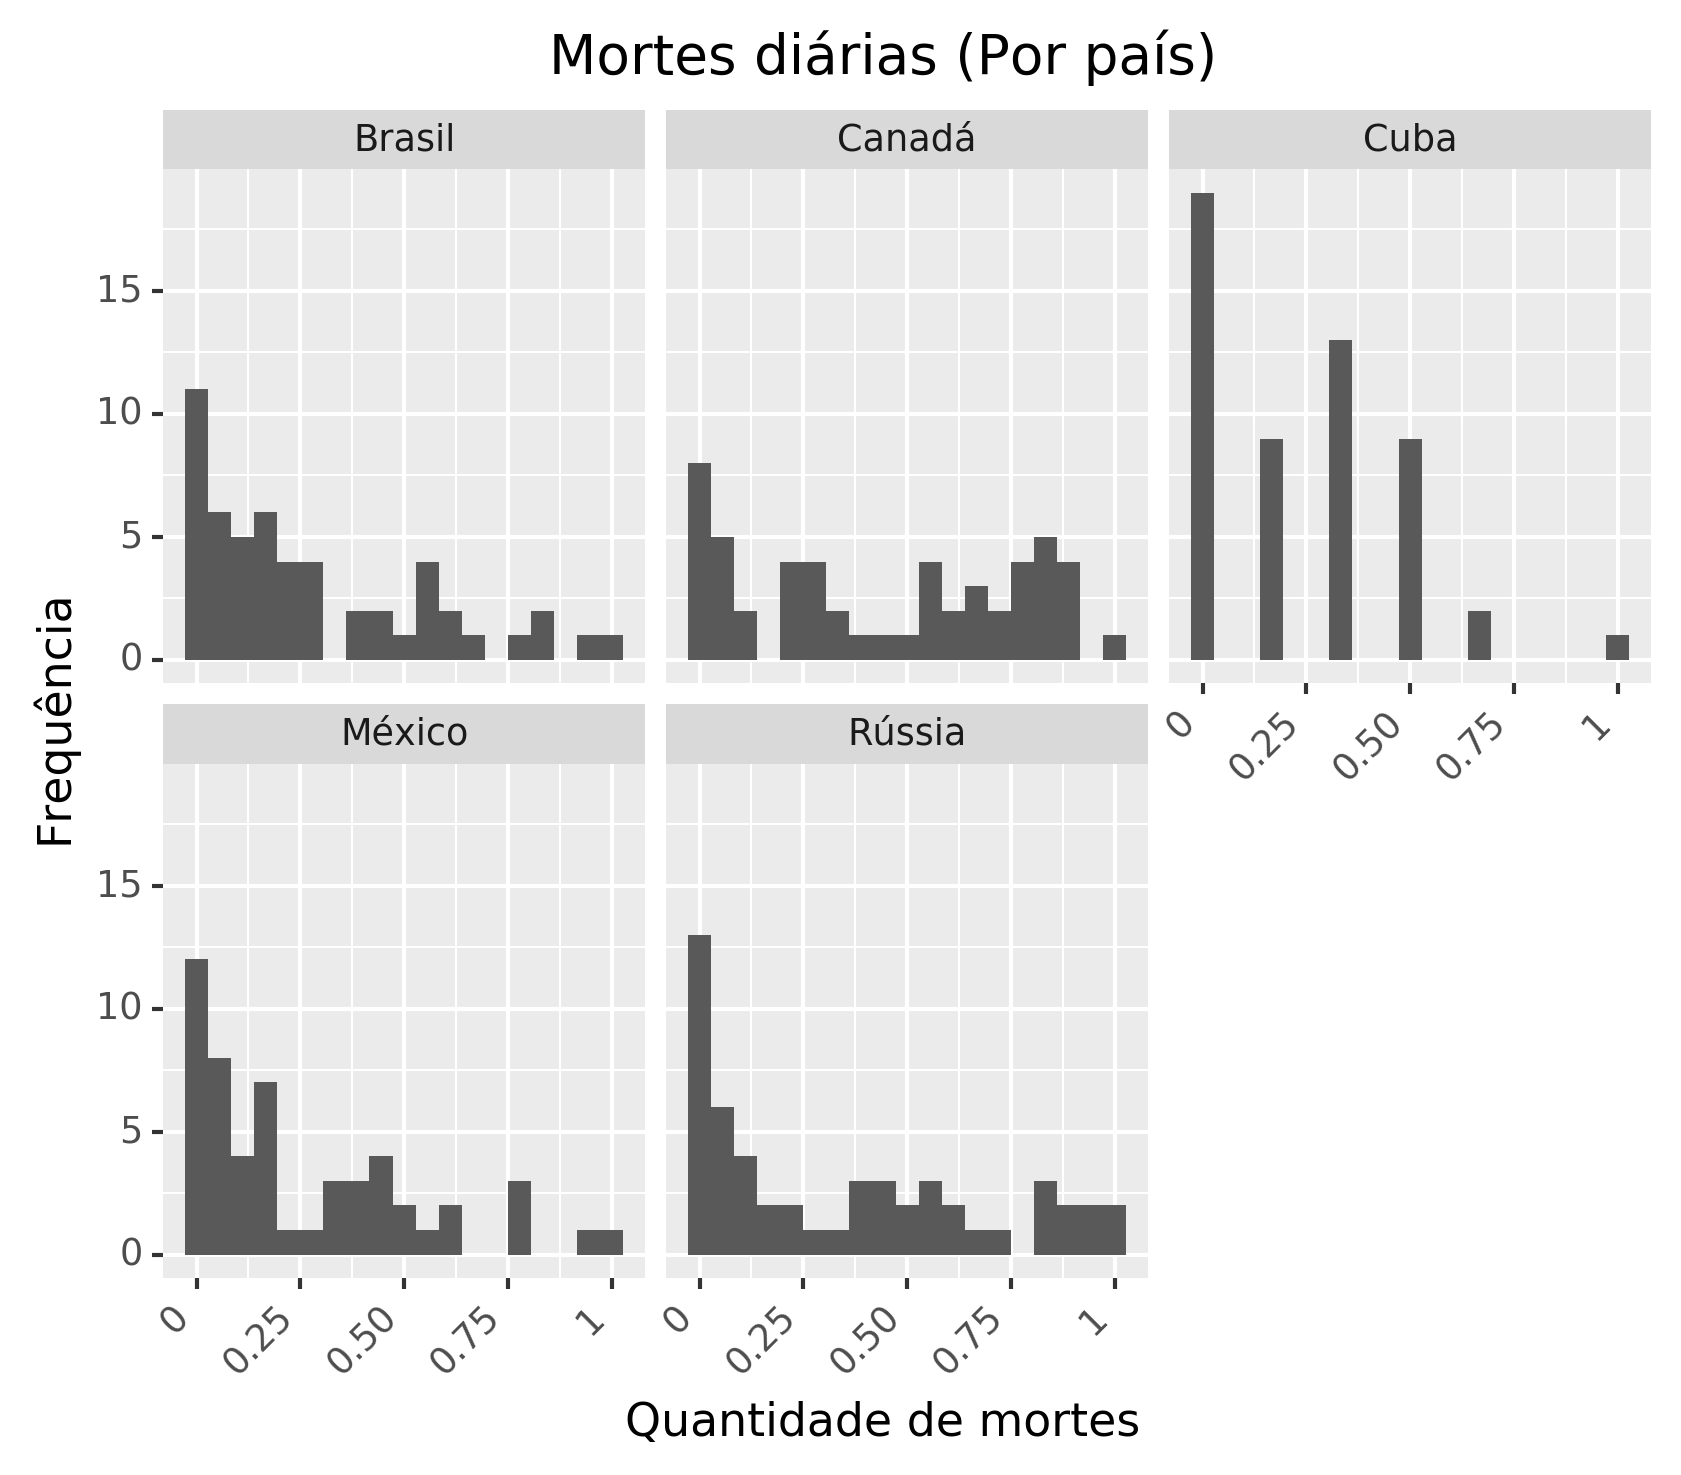

<ggplot: (-9223363280816225066)>

In [21]:
plot_histogram_bycountry(data_owd, 'new_deaths', 'Mortes diárias (Por país)', 
                                                             'Quantidade de mortes', 'Frequência')

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 18 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


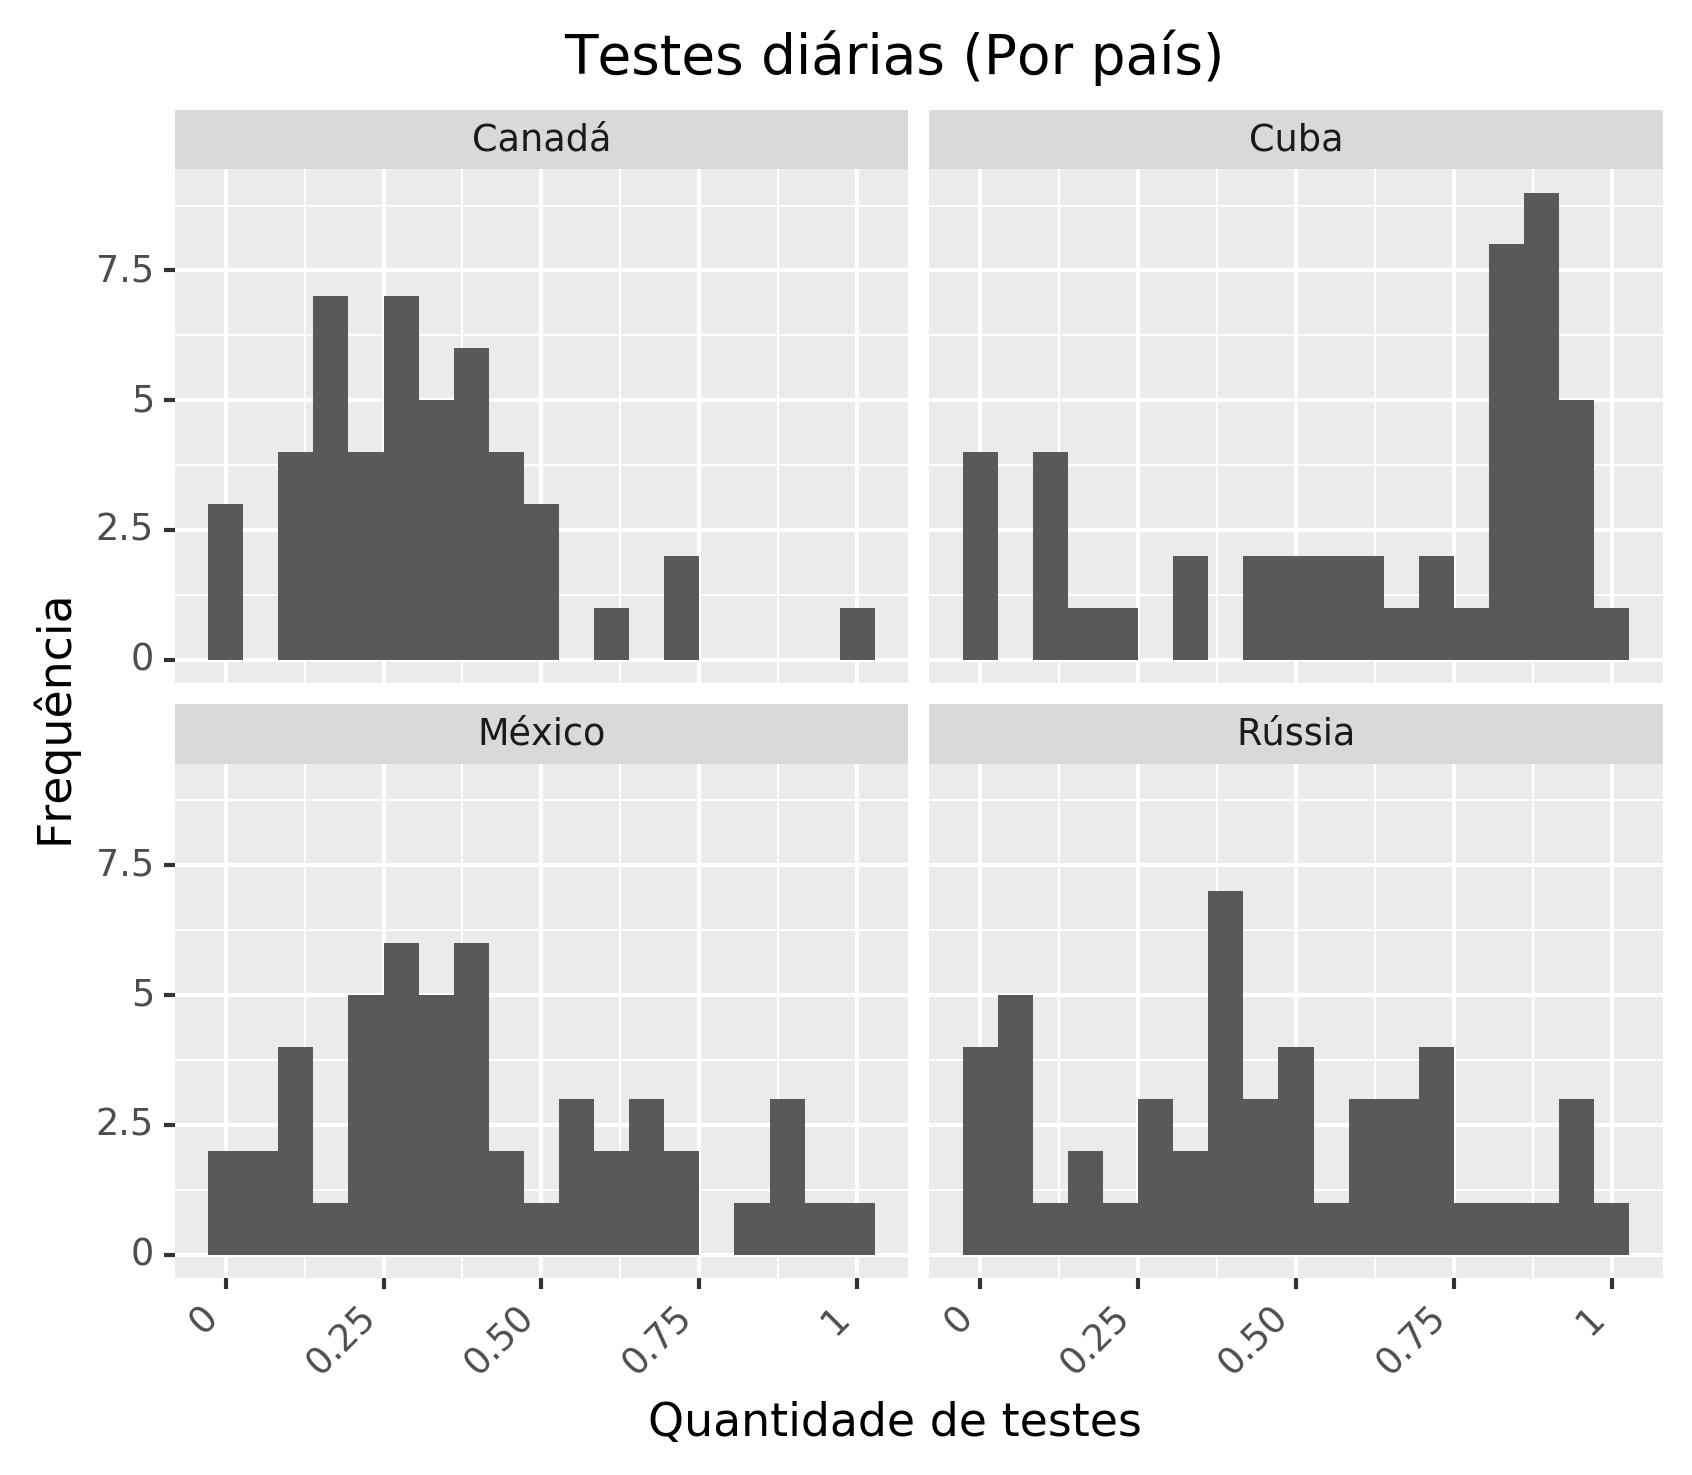

<ggplot: (-9223363280816450942)>

In [22]:
plot_histogram_bycountry(_data, 'new_tests', 'Testes diárias (Por país)', 
                                                             'Quantidade de testes', 'Frequência')

<hr>

### Espaço de Cullen-Frey e Função de Distribuição de Probabilidade (PDF)

A aplicação da classificação do espaço de Cullen-Frey foi feita através do pacote [interfacer](https://pypi.org/project/interfacer/).


In [23]:
import interfacer.descdist
import interfacer.jupyter_helper

In [24]:
def plot_cullenfrey(data: pd.DataFrame):
    with interfacer.jupyter_helper.cellplot(width=800, height=640):
        interfacer.descdist.descdist(data, boot = 250)

##### Brasil - Quantidade total de casos

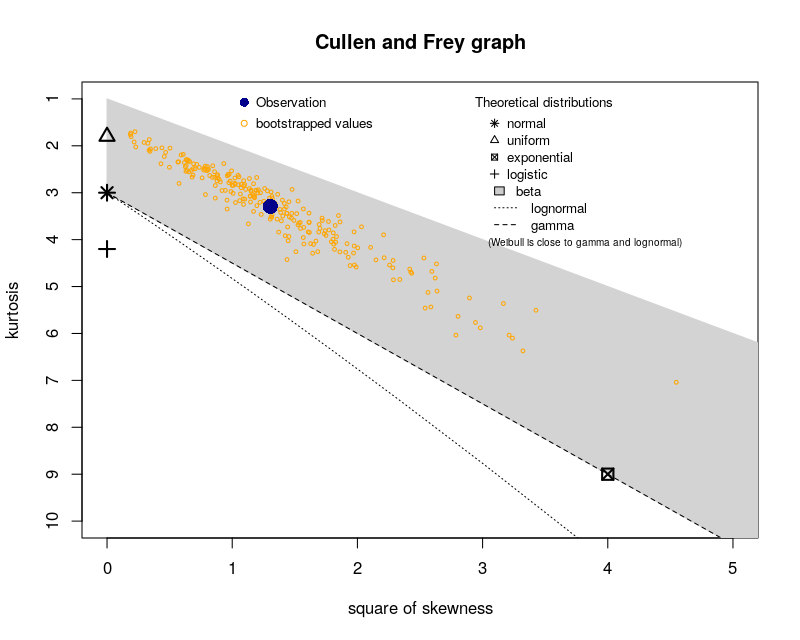

In [25]:
bra = data_owd[data_owd['iso_code'] == 'BRA']

plot_cullenfrey(bra.total_cases)

##### Brasil - Quantidade diária de casos

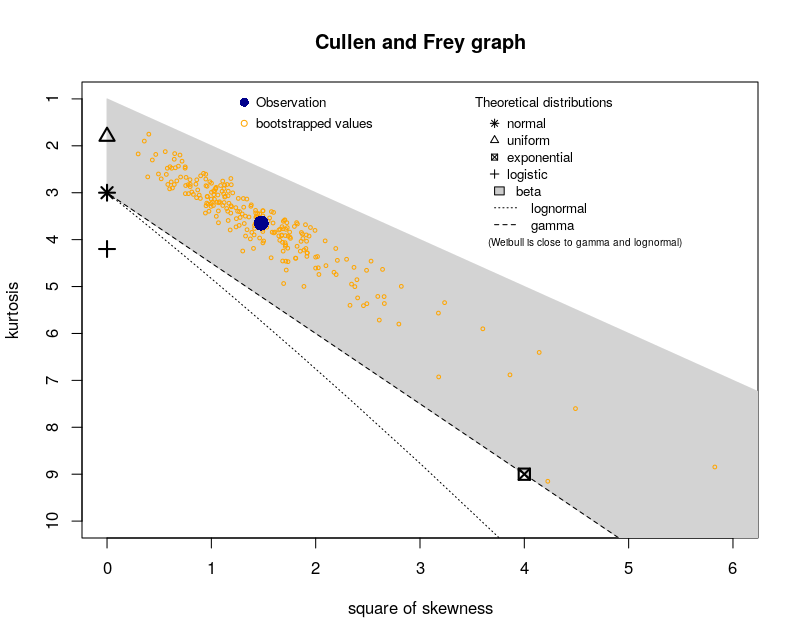

In [26]:
plot_cullenfrey(bra.new_cases)

##### Brasil - Quantidade total de mortes

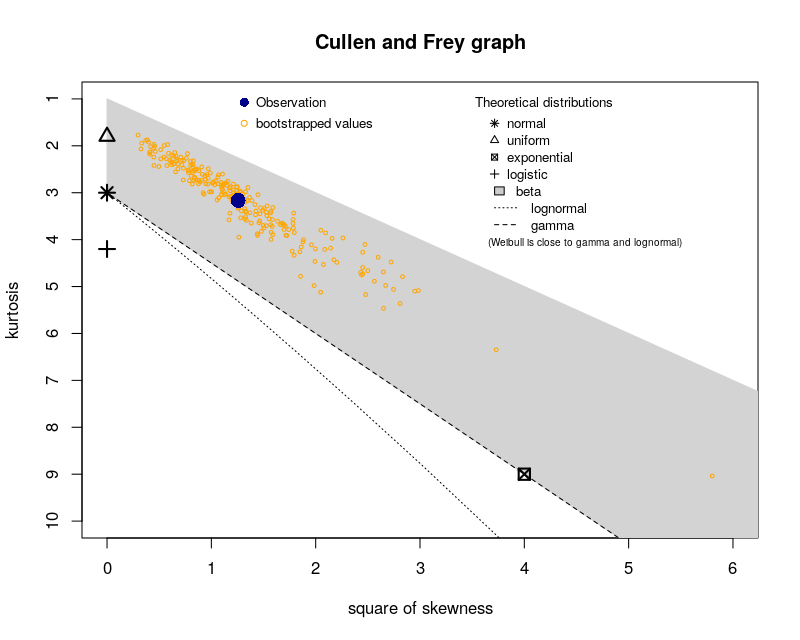

In [27]:
plot_cullenfrey(bra.total_deaths)

##### Brasil - Quantidade diária de mortes

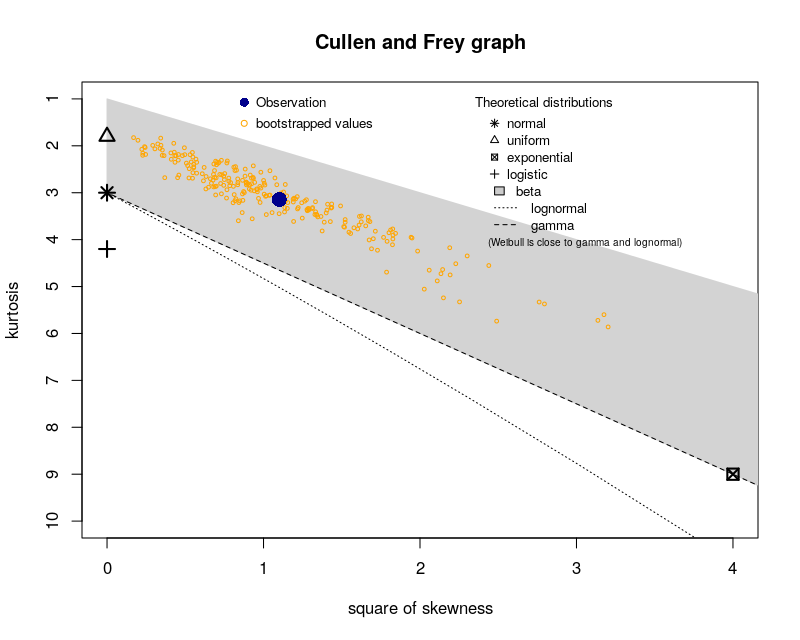

In [28]:
plot_cullenfrey(bra.new_deaths)

##### Canadá - Quantidade total de casos

In [29]:
can = data_owd[data_owd['iso_code'] == 'CAN']

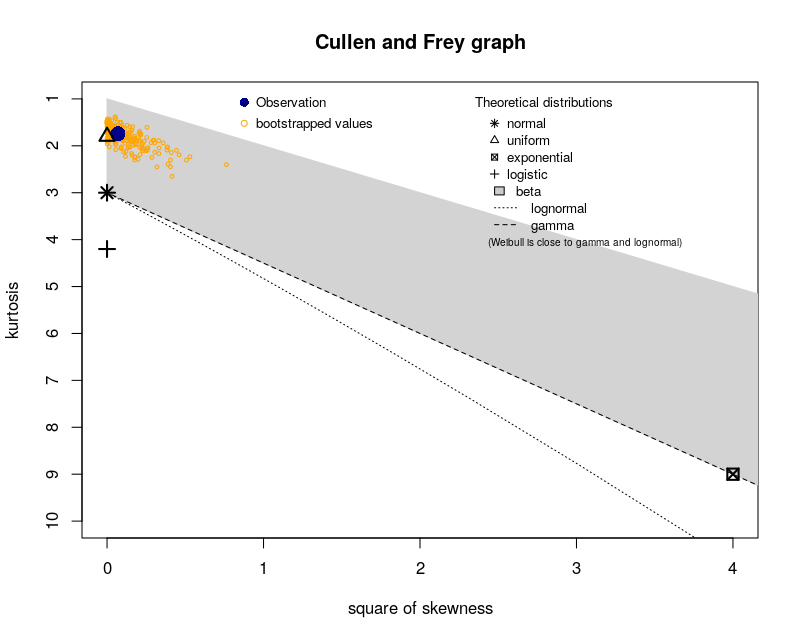

In [30]:
plot_cullenfrey(can.total_cases)

In [100]:
def fit_pdf(data, **args):
    # Retirado do pacote ests
    from fitter import Fitter

    # Realizando fit
    f = Fitter(data, **args)
    f.fit()

    # plotando o melhor resultado 
    # (Criado para customizar o plot do fitter)
    best = f.get_best()
    bestname =  list(best.keys())[0]
    bestparams = best[bestname]
    pdf = getattr(scipy.stats.distributions, bestname)

    fitted_data = pdf.pdf(x, *bestparams)
    plt.figure(dpi = 300)
    plt.hist(data, density = True)
    plt.plot(np.linspace(0, 100000, 100), fitted_data, 'b--', label = f'Distribuição {bestname}')
    plt.legend()
    plt.show()

Fitted gamma distribution with error=2.809003362152319e-08)
Fitted uniform distribution with error=2.9954779001753615e-08)
Fitted beta distribution with error=2.582539490772018e-08)


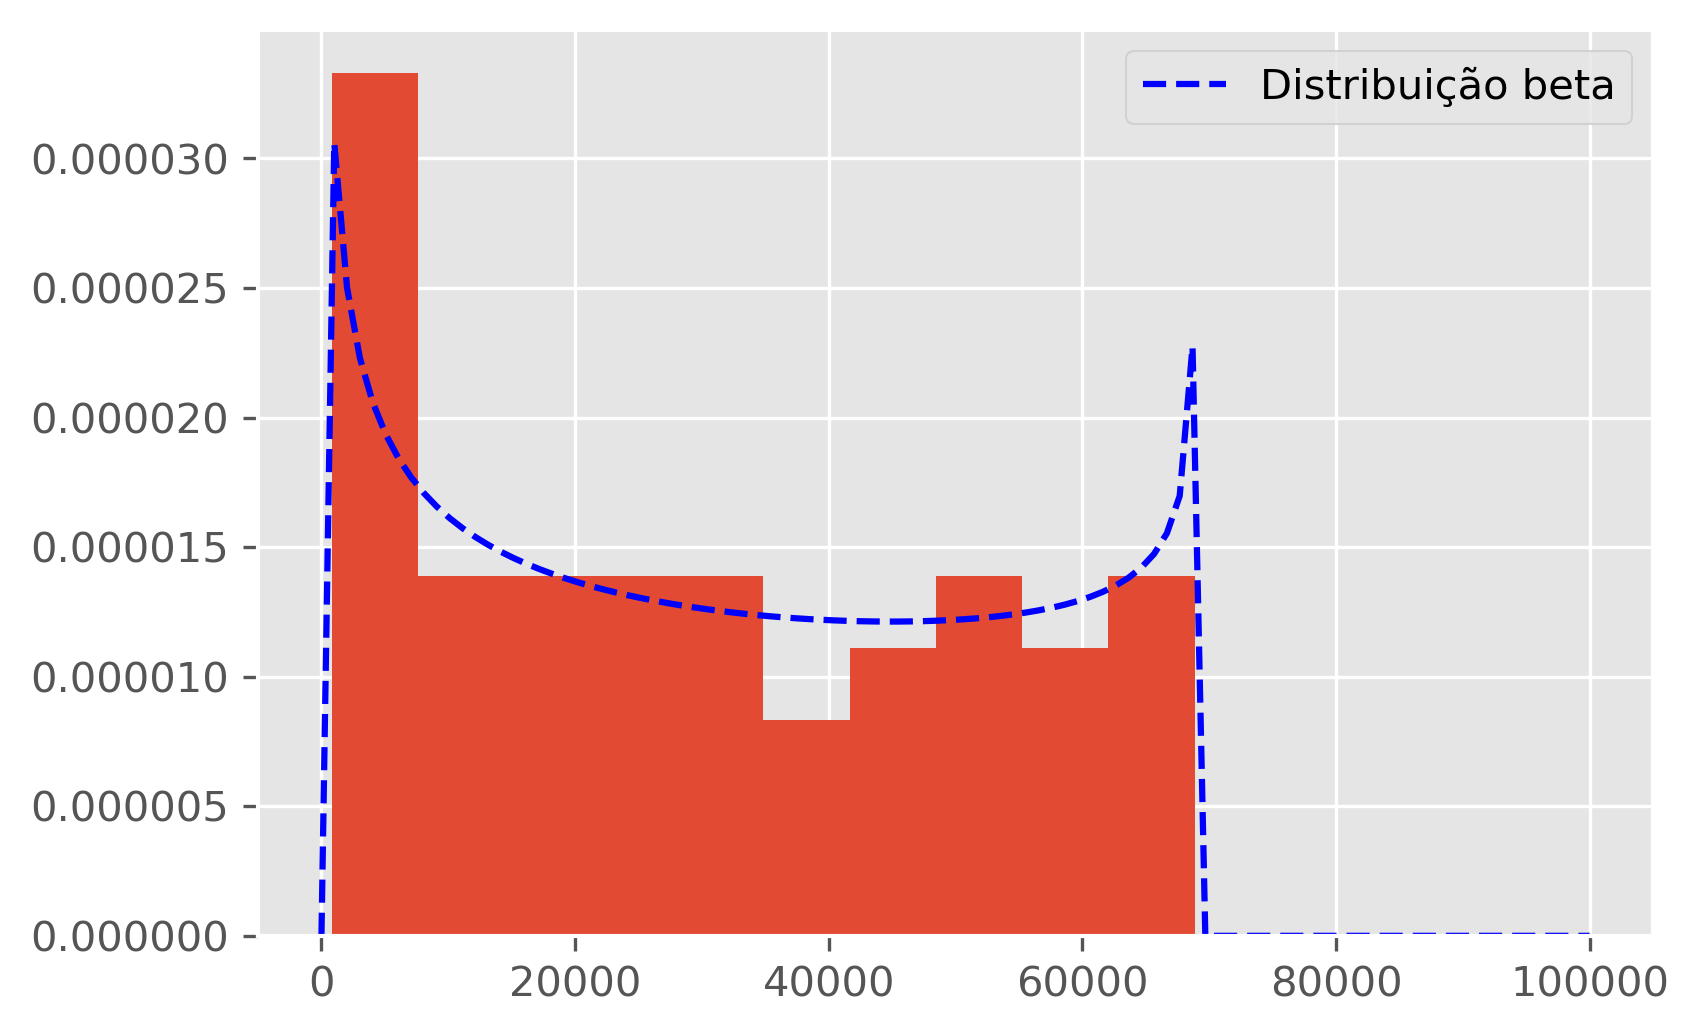

In [101]:
fit_pdf(can.total_cases, distributions = ['gamma', 'uniform', 'beta'])